In [5]:
!pwd

/home/fcerino/Documents/proyectos/fif/fif_codec/notebooks


In [6]:
%load_ext autoreload
%autoreload 2

In [7]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join('..')))

In [8]:
from codec import ImageCompressor
import warnings
from skimage import io, img_as_float
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt
from PIL import Image

from datetime import datetime
import optuna
from optuna.samplers import TPESampler

In [9]:
# ver con optuna para mejorar la busqueda
n_values = [(2**4, 2**4), (2**4, 2**5), (2**5, 2**5),
            (2**4, 2**6), (2**3, 2**7), (2**3, 2**5),
            (2**6, 2**6), (2**5, 2**6), (2**3, 2**6)
            ]

In [10]:
lena_size = os.path.getsize("../images/lena.png")
lena_size

473831

In [25]:
results = {}
a_cols = 256
fif_version = 2
magic_number = b'FIF'  # Ensure this is a bytes object
header_format = '3sBiiBBBBB'
v_format_precision = "f" 
max_error = 0.1 # no se usa
min_sparcity_range = range(10,151,20)

for min_n, max_n in n_values:
    
    results[min_n, max_n] = {}
    results[min_n, max_n]["min_sparcity_range"] = min_sparcity_range
    
    compression_rates = []
    results[min_n, max_n]["compression_rates"] = compression_rates
    
    ssim_values = []
    results[min_n, max_n]["ssim_values"] = ssim_values
        
    for min_sparcity in min_sparcity_range:
        print("min_sparcity",min_sparcity)
        
        #ENCODE
        newCodec = ImageCompressor(min_sparcity,
                                   min_n,
                                   max_n,
                                   a_cols,
                                   max_error
                                  )
        with warnings.catch_warnings():
            # Following RuntimeWarning ignored:
            # Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary.
            # The requested precision might not have been met.
            warnings.simplefilter("ignore", RuntimeWarning)    
            newCodec.encode(input_file = '../images/lena.png',
                            output_file = '../compressions/lena_compressed.fif'
                            )

        # DECODE
        newCodec.decode(input_file = '../compressions/lena_compressed.fif',
                        output_file = '../images/lena_reconstructed.png'
                        )
        
        # COMPRESSION RATE
        # ver size inicial
        compression_rate = lena_size / newCodec.non_zero_coefs
        compression_rates.append(compression_rate)
        print(f"Compression rate: {compression_rate}")

        # CALCULATE SSIM
        image1 = img_as_float(io.imread('../images/lena.png', as_gray=True))
        image2 = img_as_float(io.imread('../images/lena_reconstructed.png', as_gray=True))
        ssim_index, _ = ssim(image1,
                             image2,
                             full=True,
                             data_range=image1.max() - image1.min()
                             )
        ssim_values.append(ssim_index)
        print(f"SSIM Index: {ssim_index}\n")

min_sparcity 10
hyperparameter n_nonzero_coefs: 256
norm_0_coefs using linalg: 121.0
n_nonzero_coefs_ with scikit: 256
coefs: [ 0.00000000e+00  1.11430703e+02  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e

AssertionError: 

In [10]:
results = {}
a_cols = 256
fif_version = 2
magic_number = b'FIF'  # Ensure this is a bytes object
header_format = '3sBiiBBBBB'
v_format_precision = "f" 
max_error = 0.1 # no se usa
min_sparcity_range = range(10,151,20)

for min_n, max_n in n_values:
    
    results[min_n, max_n] = {}
    results[min_n, max_n]["min_sparcity_range"] = min_sparcity_range
    
    compression_rates = []
    results[min_n, max_n]["compression_rates"] = compression_rates
    
    ssim_values = []
    results[min_n, max_n]["ssim_values"] = ssim_values
        
    for min_sparcity in min_sparcity_range:
        print("min_sparcity",min_sparcity)
        
        #ENCODE
        newCodec = ImageCompressor(min_sparcity,
                                   min_n,
                                   max_n,
                                   a_cols,
                                   max_error
                                  )
        with warnings.catch_warnings():
            # Following RuntimeWarning ignored:
            # Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary.
            # The requested precision might not have been met.
            warnings.simplefilter("ignore", RuntimeWarning)    
            newCodec.encode(input_file = '../images/lena.png',
                            output_file = '../compressions/lena_compressed.fif'
                            )

        # DECODE
        newCodec.decode(input_file = '../compressions/lena_compressed.fif',
                        output_file = '../images/lena_reconstructed.png'
                        )
        
        # COMPRESSION RATE
        # ver size inicial
        compression_rate = lena_size / newCodec.non_zero_coefs
        compression_rates.append(compression_rate)
        print(f"Compression rate: {compression_rate}")

        # CALCULATE SSIM
        image1 = img_as_float(io.imread('../images/lena.png', as_gray=True))
        image2 = img_as_float(io.imread('../images/lena_reconstructed.png', as_gray=True))
        ssim_index, _ = ssim(image1,
                             image2,
                             full=True,
                             data_range=image1.max() - image1.min()
                             )
        ssim_values.append(ssim_index)
        print(f"SSIM Index: {ssim_index}\n")

min_sparcity 10
bytes_written: 1919530
processed_blocks: 3072
Output file saved to: ../images/lena_reconstructed.png
Compression rate: 1.2482343302572965
SSIM Index: 0.9288862771362408

min_sparcity 30
bytes_written: 1919530
processed_blocks: 3072
Output file saved to: ../images/lena_reconstructed.png
Compression rate: 1.2482343302572965
SSIM Index: 0.9288862771362408

min_sparcity 50
bytes_written: 1919530
processed_blocks: 3072
Output file saved to: ../images/lena_reconstructed.png
Compression rate: 1.2482343302572965
SSIM Index: 0.9288862771362408

min_sparcity 70
bytes_written: 1919530
processed_blocks: 3072
Output file saved to: ../images/lena_reconstructed.png
Compression rate: 1.2482343302572965
SSIM Index: 0.9288862771362408

min_sparcity 90
bytes_written: 1919530
processed_blocks: 3072
Output file saved to: ../images/lena_reconstructed.png
Compression rate: 1.2482343302572965
SSIM Index: 0.9288862771362408

min_sparcity 110
bytes_written: 1919530
processed_blocks: 3072
Output 

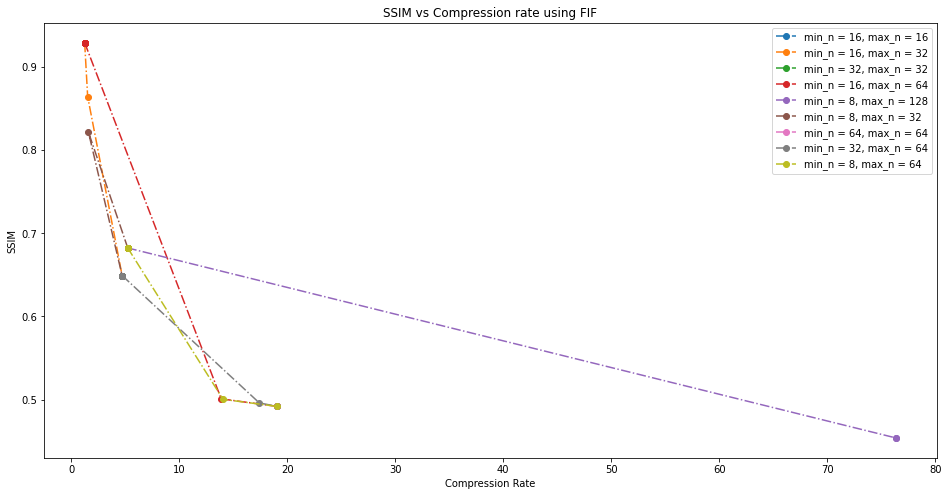

In [12]:
plt.figure(figsize=(16, 8))
for min_n, max_n in n_values:
    plt.plot(results[min_n, max_n]["compression_rates"], results[min_n, max_n]["ssim_values"],
             "o-.",label = f"min_n = {min_n}, max_n = {max_n}")
    plt.xlabel("Compression Rate")
    plt.ylabel("SSIM")
plt.legend()
plt.title("SSIM vs Compression rate using FIF")
plt.savefig('../plots/SSIM_vs_compression_rate_AQMP.png', dpi=300, bbox_inches='tight')
plt.show()

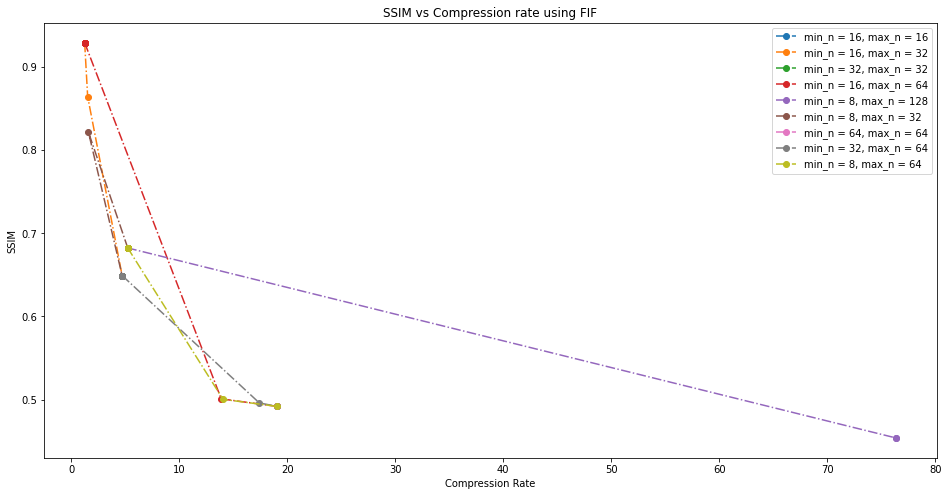

In [11]:
plt.figure(figsize=(16, 8))
for min_n, max_n in n_values:
    plt.plot(results[min_n, max_n]["compression_rates"], results[min_n, max_n]["ssim_values"],
             "o-.",label = f"min_n = {min_n}, max_n = {max_n}")
    plt.xlabel("Compression Rate")
    plt.ylabel("SSIM")
plt.legend()
plt.title("SSIM vs Compression rate using FIF")
plt.savefig('../plots/SSIM_vs_compression_rate_AQMP.png', dpi=300, bbox_inches='tight')
plt.show()

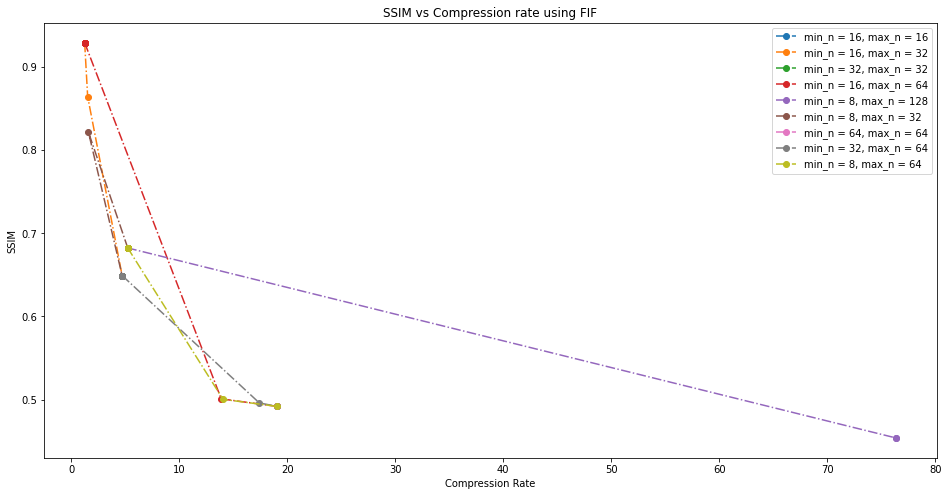

In [8]:
plt.figure(figsize=(16, 8))
for min_n, max_n in n_values:
    plt.plot(results[min_n, max_n]["compression_rates"], results[min_n, max_n]["ssim_values"],
             "o-.",label = f"min_n = {min_n}, max_n = {max_n}")
    plt.xlabel("Compression Rate")
    plt.ylabel("SSIM")
plt.legend()
plt.title("SSIM vs Compression rate using FIF")
plt.savefig('../plots/SSIM_vs_compression_rate_AQMP.png', dpi=300, bbox_inches='tight')
plt.show()

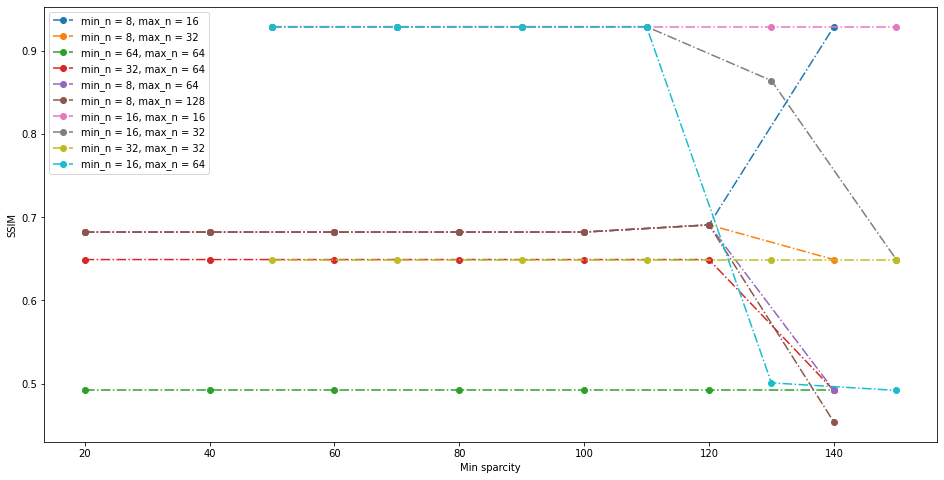

In [57]:
plt.figure(figsize=(16, 8))
for min_n, max_n in n_values:
    plt.plot([i for i in min_sparcity_range], results[min_n, max_n]["ssim_values"],
             "o-.",label = f"min_n = {min_n}, max_n = {max_n}")

for min_n, max_n in n_values2:
    plt.plot(results[min_n, max_n]["min_sparcity_range"], results[min_n, max_n]["ssim_values"],
             "o-.",label = f"min_n = {min_n}, max_n = {max_n}")

plt.xlabel("Min sparcity")
plt.ylabel("SSIM")
plt.legend()    
plt.show()

# Vemos con Optuna

In [53]:
# After running the trials, plot the results for each (n_min, n_max) pair
def plot_results():
    plt.figure(figsize=(10, 6))

    # Loop through each (n_min, n_max) pair in the results dictionary
    for pair_key, values in results.items():
        ssim_values = values['ssim_values']
        compression_rates = values['compression_rates']
        
        # Plot SSIM vs Compression Rate for this pair
        plt.plot(compression_rates, ssim_values, "o-",label=f"({pair_key[0]}, {pair_key[1]})")
    
    plt.title('SSIM vs Compression Rate for Different (n_min, n_max) Pairs')
    plt.xlabel('Compression Rate')
    plt.ylabel('SSIM Index')
    plt.legend(title='(n_min, n_max)')
    plt.grid(True)
    plt.show()

In [13]:
image = Image.open("../images/lena.png")
image = image.convert('YCbCr') # por que esta eleccion en lugar de RGB?
image.size

(512, 512)

In [14]:
lena_size = os.path.getsize("../images/lena.png")
lena_size

473831

In [46]:
a_cols = 256
max_error = 0.1  # Not used for now

def objective(trial):
    min_sparcity = trial.suggest_int('min_sparcity', 10, 150)
    exponent_min_n = trial.suggest_int('exponent_min_n', 2, 7)
    exponent_max_n = trial.suggest_int('exponent_max_n', exponent_min_n, 7)

    min_n = 2**exponent_min_n
    max_n = 2**exponent_max_n

    # Use the (n_min, n_max) pair as the key in the results dictionary
    pair_key = (min_n, max_n)
    
    if pair_key not in results:
        results[pair_key] = {'ssim_values': [], 'compression_rates': []}

    # ENCODE
    newCodec = ImageCompressor(min_sparcity,
                               min_n,
                               max_n,
                               a_cols,
                               #fif_version,
                               #magic_number,
                               #header_format,
                               #v_format_precision,
                               max_error)

    with warnings.catch_warnings():
        warnings.simplefilter("ignore", RuntimeWarning)
        newCodec.encode(input_file="../images/lena.png",
                        output_file="../compressions/lena_compressed.fif")

    # DECODE
    newCodec.decode(input_file="../compressions/lena_compressed.fif",
                    output_file="../images/lena_reconstructed.png")

    # CALCULATE SSIM
    image1 = img_as_float(io.imread('../images/lena.png', as_gray=True))
    image2 = img_as_float(io.imread('../images/lena_reconstructed.png', as_gray=True))
    ssim_index, _ = ssim(image1, image2, full=True, data_range=image1.max() - image1.min())
    
    # Record SSIM value for this pair
    results[pair_key]['ssim_values'].append(ssim_index)
    print(f"SSIM Index for ({min_n}, {max_n}): {ssim_index}\n")

    # COMPRESSION RATE
    compressed_lena_size = os.path.getsize('../images/lena_reconstructed.png')
    compression_rate = lena_size / compressed_lena_size
    
    # Record compression rate for this pair
    results[pair_key]['compression_rates'].append(compression_rate)

    return compression_rate

In [47]:
# Define a dictionary to store SSIM and compression rates for each (n_min, n_max) pair
results = {}

current_time = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
study_name = f"optuna_study_{current_time}"

sampler = TPESampler(seed=42)  # Make the sampler behave in a deterministic way
study = optuna.create_study(direction='maximize', study_name=study_name, sampler=sampler)
study.optimize(objective, n_trials=1000)

[I 2024-09-18 19:00:08,473] A new study created in memory with name: optuna_study_2024-09-18_19-00-08


bytes_written: 31367
processed_blocks: 48


[I 2024-09-18 19:00:14,497] Trial 0 finished with value: 4.018513806906846 and parameters: {'min_sparcity': 62, 'exponent_min_n': 7, 'exponent_max_n': 7}. Best is trial 0 with value: 4.018513806906846.


Output file saved to: ../images/lena_reconstructed.png
SSIM Index for (128, 128): 0.45400420221794147

bytes_written: 507547
processed_blocks: 768


[I 2024-09-18 19:00:26,026] Trial 1 finished with value: 1.9055453452318234 and parameters: {'min_sparcity': 113, 'exponent_min_n': 5, 'exponent_max_n': 5}. Best is trial 0 with value: 4.018513806906846.


Output file saved to: ../images/lena_reconstructed.png
SSIM Index for (32, 32): 0.649164739289536

bytes_written: 533997
processed_blocks: 12288


[I 2024-09-18 19:01:41,102] Trial 2 finished with value: 1.9109247899854411 and parameters: {'min_sparcity': 31, 'exponent_min_n': 2, 'exponent_max_n': 7}. Best is trial 0 with value: 4.018513806906846.


Output file saved to: ../images/lena_reconstructed.png
SSIM Index for (4, 128): 0.6821737157435316

bytes_written: 125595
processed_blocks: 192


[I 2024-09-18 19:01:47,185] Trial 3 finished with value: 3.008011528475207 and parameters: {'min_sparcity': 94, 'exponent_min_n': 6, 'exponent_max_n': 6}. Best is trial 0 with value: 4.018513806906846.


Output file saved to: ../images/lena_reconstructed.png
SSIM Index for (64, 64): 0.4919963138776112

bytes_written: 125595
processed_blocks: 192


[I 2024-09-18 19:01:53,173] Trial 4 finished with value: 3.008011528475207 and parameters: {'min_sparcity': 146, 'exponent_min_n': 6, 'exponent_max_n': 6}. Best is trial 0 with value: 4.018513806906846.


Output file saved to: ../images/lena_reconstructed.png
SSIM Index for (64, 64): 0.4919963138776112

bytes_written: 533997
processed_blocks: 12288


[I 2024-09-18 19:02:47,832] Trial 5 finished with value: 1.9109247899854411 and parameters: {'min_sparcity': 35, 'exponent_min_n': 3, 'exponent_max_n': 4}. Best is trial 0 with value: 4.018513806906846.


Output file saved to: ../images/lena_reconstructed.png
SSIM Index for (8, 16): 0.6821737157435316

bytes_written: 1919530
processed_blocks: 3072


[I 2024-09-18 19:03:44,764] Trial 6 finished with value: 1.216432834862974 and parameters: {'min_sparcity': 83, 'exponent_min_n': 4, 'exponent_max_n': 5}. Best is trial 0 with value: 4.018513806906846.


Output file saved to: ../images/lena_reconstructed.png
SSIM Index for (16, 32): 0.9288862771362408

bytes_written: 533997
processed_blocks: 12288


[I 2024-09-18 19:03:52,887] Trial 7 finished with value: 1.9109247899854411 and parameters: {'min_sparcity': 96, 'exponent_min_n': 2, 'exponent_max_n': 3}. Best is trial 0 with value: 4.018513806906846.


Output file saved to: ../images/lena_reconstructed.png
SSIM Index for (4, 8): 0.6821737157435316

bytes_written: 1919530
processed_blocks: 3072


[I 2024-09-18 19:04:59,222] Trial 8 finished with value: 1.216432834862974 and parameters: {'min_sparcity': 61, 'exponent_min_n': 4, 'exponent_max_n': 7}. Best is trial 0 with value: 4.018513806906846.


Output file saved to: ../images/lena_reconstructed.png
SSIM Index for (16, 128): 0.9288862771362408

bytes_written: 507547
processed_blocks: 768


[I 2024-09-18 19:05:16,708] Trial 9 finished with value: 1.9055453452318234 and parameters: {'min_sparcity': 38, 'exponent_min_n': 5, 'exponent_max_n': 6}. Best is trial 0 with value: 4.018513806906846.


Output file saved to: ../images/lena_reconstructed.png
SSIM Index for (32, 64): 0.649164739289536

bytes_written: 31367
processed_blocks: 48


[I 2024-09-18 19:05:23,876] Trial 10 finished with value: 4.018513806906846 and parameters: {'min_sparcity': 62, 'exponent_min_n': 7, 'exponent_max_n': 7}. Best is trial 0 with value: 4.018513806906846.


Output file saved to: ../images/lena_reconstructed.png
SSIM Index for (128, 128): 0.45400420221794147

bytes_written: 31367
processed_blocks: 48


[I 2024-09-18 19:05:31,593] Trial 11 finished with value: 4.018513806906846 and parameters: {'min_sparcity': 59, 'exponent_min_n': 7, 'exponent_max_n': 7}. Best is trial 0 with value: 4.018513806906846.


Output file saved to: ../images/lena_reconstructed.png
SSIM Index for (128, 128): 0.45400420221794147

bytes_written: 31367
processed_blocks: 48


[I 2024-09-18 19:05:38,677] Trial 12 finished with value: 4.018513806906846 and parameters: {'min_sparcity': 62, 'exponent_min_n': 7, 'exponent_max_n': 7}. Best is trial 0 with value: 4.018513806906846.


Output file saved to: ../images/lena_reconstructed.png
SSIM Index for (128, 128): 0.45400420221794147

bytes_written: 31367
processed_blocks: 48


[I 2024-09-18 19:05:45,608] Trial 13 finished with value: 4.018513806906846 and parameters: {'min_sparcity': 12, 'exponent_min_n': 7, 'exponent_max_n': 7}. Best is trial 0 with value: 4.018513806906846.


Output file saved to: ../images/lena_reconstructed.png
SSIM Index for (128, 128): 0.45400420221794147

bytes_written: 125595
processed_blocks: 192


[I 2024-09-18 19:05:57,035] Trial 14 finished with value: 3.008011528475207 and parameters: {'min_sparcity': 119, 'exponent_min_n': 6, 'exponent_max_n': 7}. Best is trial 0 with value: 4.018513806906846.


Output file saved to: ../images/lena_reconstructed.png
SSIM Index for (64, 128): 0.4919963138776112

bytes_written: 31367
processed_blocks: 48


[I 2024-09-18 19:06:03,699] Trial 15 finished with value: 4.018513806906846 and parameters: {'min_sparcity': 72, 'exponent_min_n': 7, 'exponent_max_n': 7}. Best is trial 0 with value: 4.018513806906846.


Output file saved to: ../images/lena_reconstructed.png
SSIM Index for (128, 128): 0.45400420221794147

bytes_written: 125595
processed_blocks: 192


[I 2024-09-18 19:06:14,876] Trial 16 finished with value: 3.008011528475207 and parameters: {'min_sparcity': 47, 'exponent_min_n': 6, 'exponent_max_n': 7}. Best is trial 0 with value: 4.018513806906846.


Output file saved to: ../images/lena_reconstructed.png
SSIM Index for (64, 128): 0.4919963138776112

bytes_written: 507547
processed_blocks: 768


[I 2024-09-18 19:06:34,131] Trial 17 finished with value: 1.9055453452318234 and parameters: {'min_sparcity': 14, 'exponent_min_n': 5, 'exponent_max_n': 6}. Best is trial 0 with value: 4.018513806906846.


Output file saved to: ../images/lena_reconstructed.png
SSIM Index for (32, 64): 0.649164739289536

bytes_written: 31367
processed_blocks: 48


[I 2024-09-18 19:06:40,806] Trial 18 finished with value: 4.018513806906846 and parameters: {'min_sparcity': 79, 'exponent_min_n': 7, 'exponent_max_n': 7}. Best is trial 0 with value: 4.018513806906846.


Output file saved to: ../images/lena_reconstructed.png
SSIM Index for (128, 128): 0.45400420221794147

bytes_written: 125595
processed_blocks: 192


[I 2024-09-18 19:06:52,228] Trial 19 finished with value: 3.008011528475207 and parameters: {'min_sparcity': 52, 'exponent_min_n': 6, 'exponent_max_n': 7}. Best is trial 0 with value: 4.018513806906846.


Output file saved to: ../images/lena_reconstructed.png
SSIM Index for (64, 128): 0.4919963138776112

bytes_written: 1919530
processed_blocks: 3072


[I 2024-09-18 19:08:02,330] Trial 20 finished with value: 1.216432834862974 and parameters: {'min_sparcity': 108, 'exponent_min_n': 4, 'exponent_max_n': 6}. Best is trial 0 with value: 4.018513806906846.


Output file saved to: ../images/lena_reconstructed.png
SSIM Index for (16, 64): 0.9288862771362408

bytes_written: 31367
processed_blocks: 48


[I 2024-09-18 19:08:09,060] Trial 21 finished with value: 4.018513806906846 and parameters: {'min_sparcity': 64, 'exponent_min_n': 7, 'exponent_max_n': 7}. Best is trial 0 with value: 4.018513806906846.


Output file saved to: ../images/lena_reconstructed.png
SSIM Index for (128, 128): 0.45400420221794147



[W 2024-09-18 19:08:13,579] Trial 22 failed with parameters: {'min_sparcity': 50, 'exponent_min_n': 7, 'exponent_max_n': 7} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/home/fcerino/.local/lib/python3.8/site-packages/optuna/study/_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
  File "/tmp/ipykernel_113434/1733876610.py", line 31, in objective
    newCodec.encode(input_file="../images/lena.png",
  File "/home/fcerino/Documents/proyectos/fif/fif_codec/codec.py", line 60, in encode
    channel_processed_blocks, x_list = self.omp_handler.omp_code(
  File "/home/fcerino/Documents/proyectos/fif/fif_codec/omp.py", line 50, in omp_code
    channel_processed_blocks, x_list = self.omp_code_recursive(
  File "/home/fcerino/Documents/proyectos/fif/fif_codec/omp.py", line 66, in omp_code_recursive
    omp.fit(dict_, sub_image_data)
  File "/home/fcerino/.local/lib/python3.8/site-packages/sklearn/linear_model/_omp.py", lin

KeyboardInterrupt: 

In [48]:
study.best_params

{'min_sparcity': 62, 'exponent_min_n': 7, 'exponent_max_n': 7}

In [49]:
# After running the trials, plot the results for each (n_min, n_max) pair
def plot_results():
    plt.figure(figsize=(10, 6))

    # Loop through each (n_min, n_max) pair in the results dictionary
    for pair_key, values in results.items():
        ssim_values = values['ssim_values']
        compression_rates = values['compression_rates']
        
        # Plot SSIM vs Compression Rate for this pair
        plt.plot(compression_rates, ssim_values, "o-",label=f"({pair_key[0]}, {pair_key[1]})")
    
    plt.title('SSIM vs Compression Rate for Different (n_min, n_max) Pairs')
    plt.xlabel('Compression Rate')
    plt.ylabel('SSIM Index')
    plt.legend(title='(n_min, n_max)')
    plt.grid(True)
    plt.show()

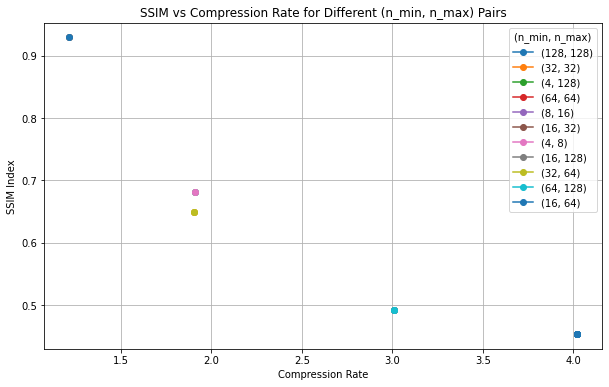

In [50]:
plot_results()

In [ ]:
# Define a dictionary to store SSIM and compression rates for each (n_min, n_max) pair
results = {}


In [52]:
def objective(trial):
    min_sparcity = trial.suggest_int('min_sparcity', 10, 150)
    exponent_min_n = 4 #trial.suggest_int('exponent_min_n', 2, 7)
    exponent_max_n = 5 #trial.suggest_int('exponent_max_n', exponent_min_n, 7)

    min_n = 2**exponent_min_n
    max_n = 2**exponent_max_n

    # Use the (n_min, n_max) pair as the key in the results dictionary
    pair_key = (min_n, max_n)
    
    if pair_key not in results:
        results[pair_key] = {'ssim_values': [], 'compression_rates': []}

    # ENCODE
    newCodec = ImageCompressor(min_sparcity,
                               min_n,
                               max_n,
                               a_cols,
                               #fif_version,
                               #magic_number,
                               #header_format,
                               #v_format_precision,
                               max_error)

    with warnings.catch_warnings():
        warnings.simplefilter("ignore", RuntimeWarning)
        newCodec.encode(input_file="../images/lena.png",
                        output_file="../compressions/lena_compressed.fif")

    # DECODE
    newCodec.decode(input_file="../compressions/lena_compressed.fif",
                    output_file="../images/lena_reconstructed.png")

    # CALCULATE SSIM
    image1 = img_as_float(io.imread('../images/lena.png', as_gray=True))
    image2 = img_as_float(io.imread('../images/lena_reconstructed.png', as_gray=True))
    ssim_index, _ = ssim(image1, image2, full=True, data_range=image1.max() - image1.min())
    
    # Record SSIM value for this pair
    results[pair_key]['ssim_values'].append(ssim_index)
    print(f"SSIM Index for ({min_n}, {max_n}): {ssim_index}\n")

    # COMPRESSION RATE
    compressed_lena_size = os.path.getsize('../images/lena_reconstructed.png')
    compression_rate = lena_size / compressed_lena_size
    
    # Record compression rate for this pair
    results[pair_key]['compression_rates'].append(compression_rate)

    return compression_rate


current_time = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
study_name = f"optuna_study_{current_time}"

sampler = TPESampler(seed=42)  # Make the sampler behave in a deterministic way
study = optuna.create_study(direction='maximize', study_name=study_name, sampler=sampler)
study.optimize(objective, n_trials=15)

[I 2024-09-18 19:11:27,779] A new study created in memory with name: optuna_study_2024-09-18_19-11-27


bytes_written: 1919530
processed_blocks: 3072


[I 2024-09-18 19:12:26,463] Trial 0 finished with value: 1.216432834862974 and parameters: {'min_sparcity': 62}. Best is trial 0 with value: 1.216432834862974.


Output file saved to: ../images/lena_reconstructed.png
SSIM Index for (16, 32): 0.9288862771362408

bytes_written: 507547
processed_blocks: 768


[I 2024-09-18 19:12:40,519] Trial 1 finished with value: 1.9055453452318234 and parameters: {'min_sparcity': 144}. Best is trial 1 with value: 1.9055453452318234.


Output file saved to: ../images/lena_reconstructed.png
SSIM Index for (16, 32): 0.649164739289536

bytes_written: 1919530
processed_blocks: 3072


[I 2024-09-18 19:13:37,671] Trial 2 finished with value: 1.216432834862974 and parameters: {'min_sparcity': 113}. Best is trial 1 with value: 1.9055453452318234.


Output file saved to: ../images/lena_reconstructed.png
SSIM Index for (16, 32): 0.9288862771362408

bytes_written: 1919530
processed_blocks: 3072


[I 2024-09-18 19:14:35,388] Trial 3 finished with value: 1.216432834862974 and parameters: {'min_sparcity': 94}. Best is trial 1 with value: 1.9055453452318234.


Output file saved to: ../images/lena_reconstructed.png
SSIM Index for (16, 32): 0.9288862771362408

bytes_written: 1919530
processed_blocks: 3072


[I 2024-09-18 19:15:34,589] Trial 4 finished with value: 1.216432834862974 and parameters: {'min_sparcity': 31}. Best is trial 1 with value: 1.9055453452318234.


Output file saved to: ../images/lena_reconstructed.png
SSIM Index for (16, 32): 0.9288862771362408

bytes_written: 1919530
processed_blocks: 3072


[I 2024-09-18 19:16:32,254] Trial 5 finished with value: 1.216432834862974 and parameters: {'min_sparcity': 31}. Best is trial 1 with value: 1.9055453452318234.


Output file saved to: ../images/lena_reconstructed.png
SSIM Index for (16, 32): 0.9288862771362408

bytes_written: 1919530
processed_blocks: 3072


[I 2024-09-18 19:17:29,268] Trial 6 finished with value: 1.216432834862974 and parameters: {'min_sparcity': 18}. Best is trial 1 with value: 1.9055453452318234.


Output file saved to: ../images/lena_reconstructed.png
SSIM Index for (16, 32): 0.9288862771362408

bytes_written: 507547
processed_blocks: 768


[I 2024-09-18 19:17:42,795] Trial 7 finished with value: 1.9055453452318234 and parameters: {'min_sparcity': 132}. Best is trial 1 with value: 1.9055453452318234.


Output file saved to: ../images/lena_reconstructed.png
SSIM Index for (16, 32): 0.649164739289536

bytes_written: 1919530
processed_blocks: 3072


[I 2024-09-18 19:18:44,208] Trial 8 finished with value: 1.216432834862974 and parameters: {'min_sparcity': 94}. Best is trial 1 with value: 1.9055453452318234.


Output file saved to: ../images/lena_reconstructed.png
SSIM Index for (16, 32): 0.9288862771362408

bytes_written: 1919530
processed_blocks: 3072


[I 2024-09-18 19:19:44,141] Trial 9 finished with value: 1.216432834862974 and parameters: {'min_sparcity': 109}. Best is trial 1 with value: 1.9055453452318234.


Output file saved to: ../images/lena_reconstructed.png
SSIM Index for (16, 32): 0.9288862771362408

bytes_written: 507547
processed_blocks: 768


[I 2024-09-18 19:19:57,447] Trial 10 finished with value: 1.9055453452318234 and parameters: {'min_sparcity': 148}. Best is trial 1 with value: 1.9055453452318234.


Output file saved to: ../images/lena_reconstructed.png
SSIM Index for (16, 32): 0.649164739289536

bytes_written: 507547
processed_blocks: 768


[I 2024-09-18 19:20:10,737] Trial 11 finished with value: 1.9055453452318234 and parameters: {'min_sparcity': 145}. Best is trial 1 with value: 1.9055453452318234.


Output file saved to: ../images/lena_reconstructed.png
SSIM Index for (16, 32): 0.649164739289536

bytes_written: 1919530
processed_blocks: 3072


[I 2024-09-18 19:21:09,144] Trial 12 finished with value: 1.216432834862974 and parameters: {'min_sparcity': 125}. Best is trial 1 with value: 1.9055453452318234.


Output file saved to: ../images/lena_reconstructed.png
SSIM Index for (16, 32): 0.9288862771362408

bytes_written: 507547
processed_blocks: 768


[I 2024-09-18 19:21:23,135] Trial 13 finished with value: 1.9055453452318234 and parameters: {'min_sparcity': 132}. Best is trial 1 with value: 1.9055453452318234.


Output file saved to: ../images/lena_reconstructed.png
SSIM Index for (16, 32): 0.649164739289536

bytes_written: 1919530
processed_blocks: 3072


[I 2024-09-18 19:22:22,380] Trial 14 finished with value: 1.216432834862974 and parameters: {'min_sparcity': 66}. Best is trial 1 with value: 1.9055453452318234.


Output file saved to: ../images/lena_reconstructed.png
SSIM Index for (16, 32): 0.9288862771362408



In [54]:
def objective(trial):
    min_sparcity = trial.suggest_int('min_sparcity', 10, 150)
    exponent_min_n = 3 #trial.suggest_int('exponent_min_n', 2, 7)
    exponent_max_n = 6 #trial.suggest_int('exponent_max_n', exponent_min_n, 7)

    min_n = 2**exponent_min_n
    max_n = 2**exponent_max_n

    # Use the (n_min, n_max) pair as the key in the results dictionary
    pair_key = (min_n, max_n)
    
    if pair_key not in results:
        results[pair_key] = {'ssim_values': [], 'compression_rates': []}

    # ENCODE
    newCodec = ImageCompressor(min_sparcity,
                               min_n,
                               max_n,
                               a_cols,
                               #fif_version,
                               #magic_number,
                               #header_format,
                               #v_format_precision,
                               max_error)

    with warnings.catch_warnings():
        warnings.simplefilter("ignore", RuntimeWarning)
        newCodec.encode(input_file="../images/lena.png",
                        output_file="../compressions/lena_compressed.fif")

    # DECODE
    newCodec.decode(input_file="../compressions/lena_compressed.fif",
                    output_file="../images/lena_reconstructed.png")

    # CALCULATE SSIM
    image1 = img_as_float(io.imread('../images/lena.png', as_gray=True))
    image2 = img_as_float(io.imread('../images/lena_reconstructed.png', as_gray=True))
    ssim_index, _ = ssim(image1, image2, full=True, data_range=image1.max() - image1.min())
    
    # Record SSIM value for this pair
    results[pair_key]['ssim_values'].append(ssim_index)
    print(f"SSIM Index for ({min_n}, {max_n}): {ssim_index}\n")

    # COMPRESSION RATE
    compressed_lena_size = os.path.getsize('../images/lena_reconstructed.png')
    compression_rate = lena_size / compressed_lena_size
    
    # Record compression rate for this pair
    results[pair_key]['compression_rates'].append(compression_rate)

    return compression_rate


current_time = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
study_name = f"optuna_study_{current_time}"

sampler = TPESampler(seed=42)  # Make the sampler behave in a deterministic way
study = optuna.create_study(direction='maximize', study_name=study_name, sampler=sampler)
study.optimize(objective, n_trials=15)

[I 2024-09-18 19:22:22,423] A new study created in memory with name: optuna_study_2024-09-18_19-22-22


bytes_written: 533997
processed_blocks: 12288


[I 2024-09-18 19:23:41,474] Trial 0 finished with value: 1.9109247899854411 and parameters: {'min_sparcity': 62}. Best is trial 0 with value: 1.9109247899854411.


Output file saved to: ../images/lena_reconstructed.png
SSIM Index for (8, 64): 0.6821737157435316

bytes_written: 125595
processed_blocks: 192


[I 2024-09-18 19:23:47,930] Trial 1 finished with value: 3.008011528475207 and parameters: {'min_sparcity': 144}. Best is trial 1 with value: 3.008011528475207.


Output file saved to: ../images/lena_reconstructed.png
SSIM Index for (8, 64): 0.4919963138776112

bytes_written: 549562
processed_blocks: 12168


[I 2024-09-18 19:25:05,059] Trial 2 finished with value: 1.885534305883851 and parameters: {'min_sparcity': 113}. Best is trial 1 with value: 3.008011528475207.


Output file saved to: ../images/lena_reconstructed.png
SSIM Index for (8, 64): 0.6825002781845944

bytes_written: 533997
processed_blocks: 12288


[I 2024-09-18 19:26:22,299] Trial 3 finished with value: 1.9109247899854411 and parameters: {'min_sparcity': 94}. Best is trial 1 with value: 3.008011528475207.


Output file saved to: ../images/lena_reconstructed.png
SSIM Index for (8, 64): 0.6821737157435316

bytes_written: 533997
processed_blocks: 12288


[I 2024-09-18 19:27:39,200] Trial 4 finished with value: 1.9109247899854411 and parameters: {'min_sparcity': 31}. Best is trial 1 with value: 3.008011528475207.


Output file saved to: ../images/lena_reconstructed.png
SSIM Index for (8, 64): 0.6821737157435316

bytes_written: 533997
processed_blocks: 12288


[I 2024-09-18 19:29:00,248] Trial 5 finished with value: 1.9109247899854411 and parameters: {'min_sparcity': 31}. Best is trial 1 with value: 3.008011528475207.


Output file saved to: ../images/lena_reconstructed.png
SSIM Index for (8, 64): 0.6821737157435316

bytes_written: 533997
processed_blocks: 12288


[I 2024-09-18 19:30:15,451] Trial 6 finished with value: 1.9109247899854411 and parameters: {'min_sparcity': 18}. Best is trial 1 with value: 3.008011528475207.


Output file saved to: ../images/lena_reconstructed.png
SSIM Index for (8, 64): 0.6821737157435316

bytes_written: 125595
processed_blocks: 192


[I 2024-09-18 19:30:22,240] Trial 7 finished with value: 3.008011528475207 and parameters: {'min_sparcity': 132}. Best is trial 1 with value: 3.008011528475207.


Output file saved to: ../images/lena_reconstructed.png
SSIM Index for (8, 64): 0.4919963138776112

bytes_written: 533997
processed_blocks: 12288


[I 2024-09-18 19:31:36,320] Trial 8 finished with value: 1.9109247899854411 and parameters: {'min_sparcity': 94}. Best is trial 1 with value: 3.008011528475207.


Output file saved to: ../images/lena_reconstructed.png
SSIM Index for (8, 64): 0.6821737157435316

bytes_written: 536575
processed_blocks: 12267


[I 2024-09-18 19:32:50,859] Trial 9 finished with value: 1.9067876070938483 and parameters: {'min_sparcity': 109}. Best is trial 1 with value: 3.008011528475207.


Output file saved to: ../images/lena_reconstructed.png
SSIM Index for (8, 64): 0.6822375915611911

bytes_written: 125595
processed_blocks: 192


[I 2024-09-18 19:32:57,761] Trial 10 finished with value: 3.008011528475207 and parameters: {'min_sparcity': 148}. Best is trial 1 with value: 3.008011528475207.


Output file saved to: ../images/lena_reconstructed.png
SSIM Index for (8, 64): 0.4919963138776112

bytes_written: 125595
processed_blocks: 192


[I 2024-09-18 19:33:04,339] Trial 11 finished with value: 3.008011528475207 and parameters: {'min_sparcity': 145}. Best is trial 1 with value: 3.008011528475207.


Output file saved to: ../images/lena_reconstructed.png
SSIM Index for (8, 64): 0.4919963138776112

bytes_written: 1438080
processed_blocks: 6132


[I 2024-09-18 19:34:12,143] Trial 12 finished with value: 1.330776619408183 and parameters: {'min_sparcity': 125}. Best is trial 1 with value: 3.008011528475207.


Output file saved to: ../images/lena_reconstructed.png
SSIM Index for (8, 64): 0.7424531849648937

bytes_written: 125595
processed_blocks: 192


[I 2024-09-18 19:34:18,732] Trial 13 finished with value: 3.008011528475207 and parameters: {'min_sparcity': 132}. Best is trial 1 with value: 3.008011528475207.


Output file saved to: ../images/lena_reconstructed.png
SSIM Index for (8, 64): 0.4919963138776112

bytes_written: 533997
processed_blocks: 12288


[I 2024-09-18 19:35:31,942] Trial 14 finished with value: 1.9109247899854411 and parameters: {'min_sparcity': 66}. Best is trial 1 with value: 3.008011528475207.


Output file saved to: ../images/lena_reconstructed.png
SSIM Index for (8, 64): 0.6821737157435316



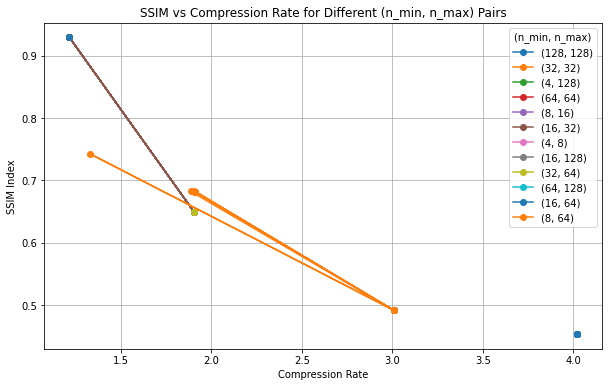

In [55]:
# Example: Running optimization and plotting results
# After completing your trials, call this function to visualize
plot_results()

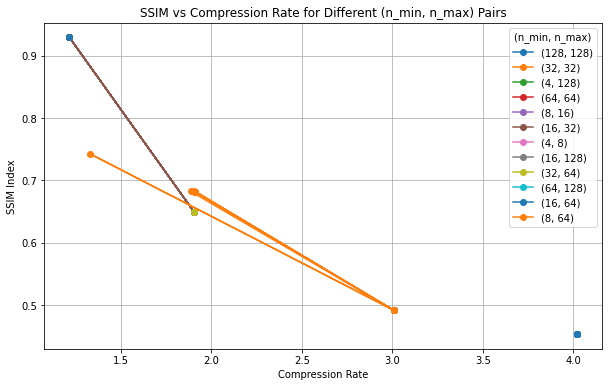

In [56]:
# Example: Running optimization and plotting results
# After completing your trials, call this function to visualize
plot_results()

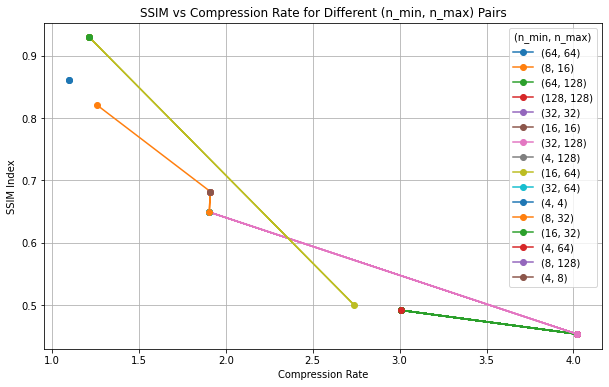

In [23]:
# Example: Running optimization and plotting results
# After completing your trials, call this function to visualize
plot_results()

# Basis visualization

In [14]:
from basis import BasisFunctions

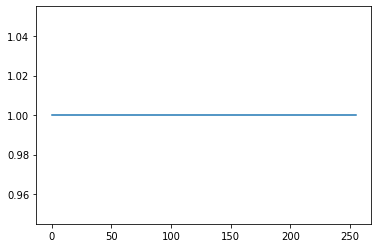

In [59]:
plt.plot(dct[:,0], label =f"{i}")

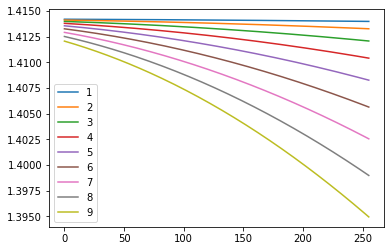

In [67]:
bf = BasisFunctions()
dct = bf.DCT1_qt(256,10)
for i in range(1,10):
    plt.plot(dct[:,i], label =f"{i}")
plt.legend()

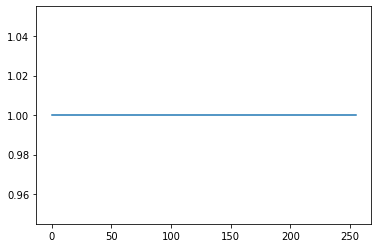

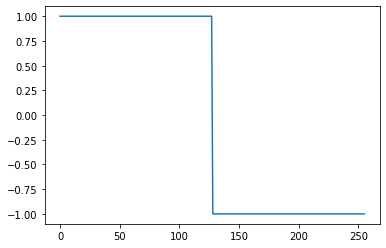

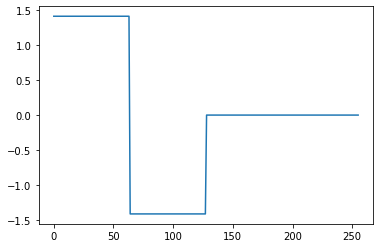

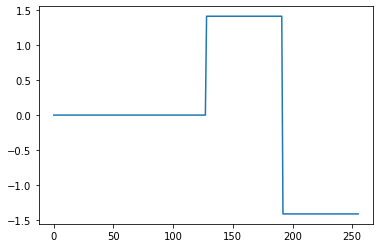

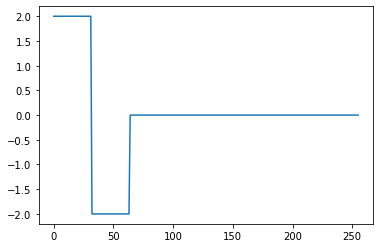

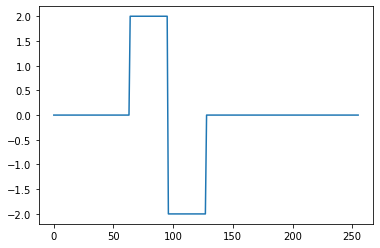

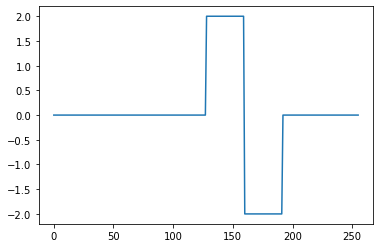

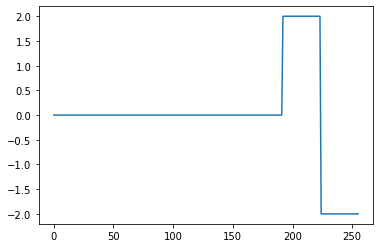

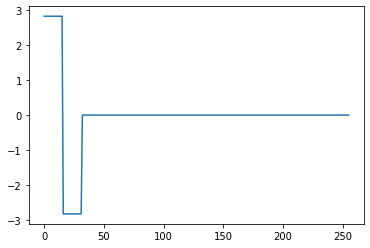

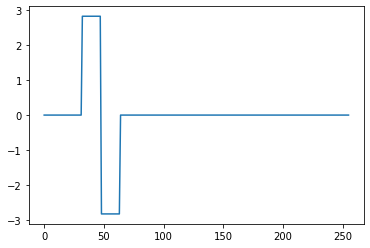

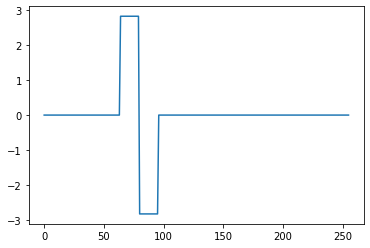

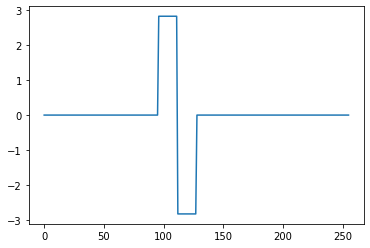

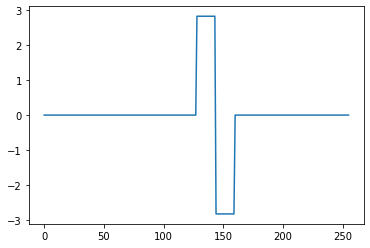

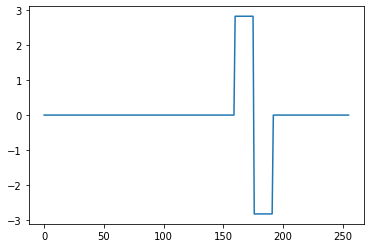

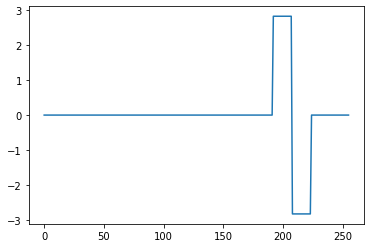

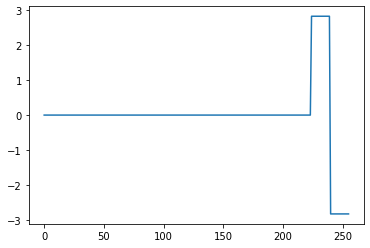

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


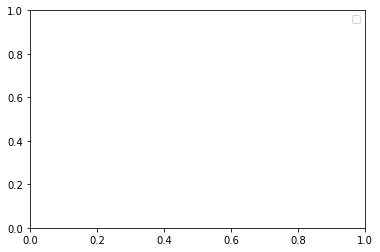

In [63]:
bf = BasisFunctions()
dct = bf.Haar1_qt(256,16)
for i in range(16):
    plt.plot(dct[:,i], label =f"{i}")
    plt.show()
plt.legend()